# **Task 1**

Missing values in each column:
 ID            0
Diagnosis     0
Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
Feature_6     0
Feature_7     0
Feature_8     0
Feature_9     0
Feature_10    0
Feature_11    0
Feature_12    0
Feature_13    0
Feature_14    0
Feature_15    0
Feature_16    0
Feature_17    0
Feature_18    0
Feature_19    0
Feature_20    0
Feature_21    0
Feature_22    0
Feature_23    0
Feature_24    0
Feature_25    0
Feature_26    0
Feature_27    0
Feature_28    0
Feature_29    0
Feature_30    0
dtype: int64
Basic statistics:
                  ID   Diagnosis   Feature_1   Feature_2   Feature_3  \
count  5.680000e+02  568.000000  568.000000  568.000000  568.000000   
mean   3.042382e+07    0.371479   14.120491   19.305335   91.914754   
std    1.251246e+08    0.483626    3.523416    4.288506   24.285848   
min    8.670000e+03    0.000000    6.981000    9.710000   43.790000   
25%    8.692225e+05    0.000000   11.697500   16.177500   75.135000  

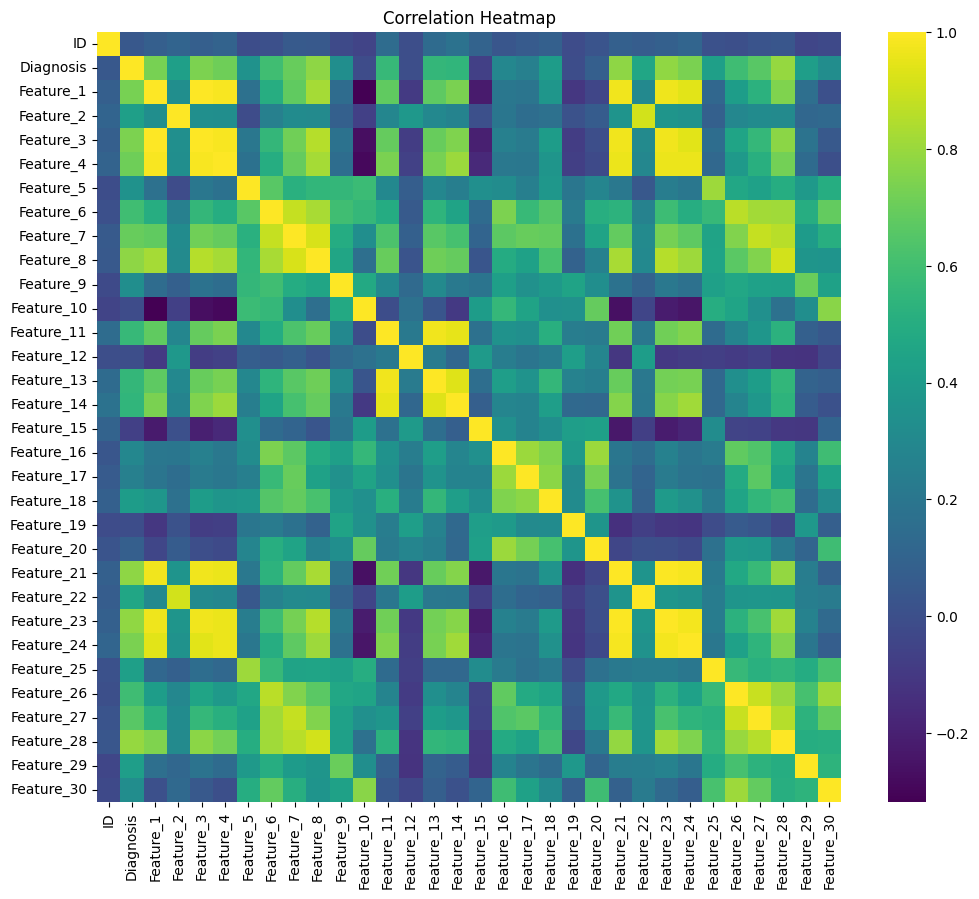

KNN Training Metrics: 
    Accuracy: 0.9420654911838791
    Sensitivity: 0.9090909090909091
    Specificity: 0.9606299212598425
    Geometric Mean: 0.9345051783794666
    False Discovery Rate: 0.07142857142857142
    False Omission Rate: 0.05058365758754864
    Matthews Correlation Coefficient: 0.8738445246254654
    
KNN Testing Metrics: 
    Accuracy: 0.9181286549707602
    Sensitivity: 0.8823529411764706
    Specificity: 0.941747572815534
    Geometric Mean: 0.9115666408549563
    False Discovery Rate: 0.09090909090909091
    False Omission Rate: 0.0761904761904762
    Matthews Correlation Coefficient: 0.8284887898200011
    
SVM Training Metrics: 
    Accuracy: 0.9672544080604534
    Sensitivity: 0.9440559440559441
    Specificity: 0.9803149606299213
    Geometric Mean: 0.9620146389892651
    False Discovery Rate: 0.03571428571428571
    False Omission Rate: 0.0311284046692607
    Matthews Correlation Coefficient: 0.9287537168186135
    
SVM Testing Metrics: 
    Accuracy: 0.947368

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, matthews_corrcoef


data = pd.read_csv('/content/wdbc.data')

# converting feature 1 into ID and feature 2 into Diagnosis as target variable
data.columns = ['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, 31)]
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})  # Convert labels to binary


X = data.drop(['ID', 'Diagnosis'], axis=1)
y = data['Diagnosis']

# EDA
# Check for missing values
print("Missing values in each column:\n", data.isnull().sum())

# Basic statistics
print("Basic statistics:\n", data.describe())

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), cmap='viridis', annot=False)
plt.title('Correlation Heatmap')
plt.show()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Support Vector Machine (Linear Kernel)
svm = SVC(kernel='linear')
# Train models
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Predict on training and testing sets
y_pred_knn_train = knn.predict(X_train)
y_pred_knn_test = knn.predict(X_test)
y_pred_svm_train = svm.predict(X_train)
y_pred_svm_test = svm.predict(X_test)

# Define a function to calculate metrics
def calculate_metrics(y_true, y_pred):
    # Confusion Matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Sensitivity (Recall for the positive class)
    sensitivity = recall_score(y_true, y_pred)

    # Specificity
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    # Geometric Mean of Sensitivity and Specificity
    geometric_mean = np.sqrt(sensitivity * specificity)

    # False Discovery Rate (FDR) = FP / (FP + TP)
    fdr = fp / (fp + tp) if (fp + tp) > 0 else 0

    # False Omission Rate (FOR) = FN / (FN + TN)
    for_ = fn / (fn + tn) if (fn + tn) > 0 else 0

    # Matthews Correlation Coefficient
    mcc = matthews_corrcoef(y_true, y_pred)

    return f"""
    Accuracy: {accuracy}
    Sensitivity: {sensitivity}
    Specificity: {specificity}
    Geometric Mean: {geometric_mean}
    False Discovery Rate: {fdr}
    False Omission Rate: {for_}
    Matthews Correlation Coefficient: {mcc}
    """

# Calculate metrics for each model on training and testing data
metrics_knn_train = calculate_metrics(y_train, y_pred_knn_train)
metrics_knn_test = calculate_metrics(y_test, y_pred_knn_test)
metrics_svm_train = calculate_metrics(y_train, y_pred_svm_train)
metrics_svm_test = calculate_metrics(y_test, y_pred_svm_test)

# Print results
print("KNN Training Metrics:", metrics_knn_train)
print("KNN Testing Metrics:", metrics_knn_test)
print("SVM Training Metrics:", metrics_svm_train)
print("SVM Testing Metrics:", metrics_svm_test)

# **Task 2**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.feature_selection import mutual_info_classif

data = pd.read_csv('/content/wdbc.data')

# converting feature 1 into ID and feature 2 into Diagnosis as target variable
data.columns = ['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, 31)]
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})  # Convert labels to binary


X = data.drop(['ID', 'Diagnosis'], axis=1)
y = data['Diagnosis']


# 1. Feature Selection using F-score or mutual information
def calculate_f_scores(X, y):
    scores = mutual_info_classif(X, y)
    feature_scores = sorted(list(zip(X.columns, scores)), key=lambda x: x[1], reverse=True)
    return feature_scores

feature_scores = calculate_f_scores(X, y)
print("Feature Importance (F-score):", feature_scores)

# 2. Model Training with SVM and Grid Search for Parameter Tuning
# Define the training-test partitions (50-50, 70-30, 80-20)
splits = [(0.5, 0.5), (0.7, 0.3), (0.8, 0.2)]
results = []

for train_size, test_size in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, test_size=test_size, random_state=42)

    # Select features based on F-score rankings (from top ranked to gradually include more)
    selected_features = [f[0] for f in feature_scores]  # List of feature names ordered by F-score
    model_results = []

    for i in range(1, len(selected_features) + 1):
        selected_X_train = X_train[selected_features[:i]]
        selected_X_test = X_test[selected_features[:i]]

        # SVM with RBF kernel
        param_grid = {
            'C': [2 ** x for x in range(-5, 16, 2)],
            'gamma': [2 ** x for x in range(-15, 4, 2)]
        }

        grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=2)
        grid_search.fit(selected_X_train, y_train)

        best_svm = grid_search.best_estimator_
        y_pred = best_svm.predict(selected_X_test)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred, output_dict=True)

        model_results.append({
            "features": selected_features[:i],
            "accuracy": accuracy,
            "conf_matrix": conf_matrix,
            "classification_report": classification_rep
        })

    results.append({
        "split": f"{int(train_size * 100)}-{int(test_size * 100)}",
        "models": model_results
    })

# 3. Output results in tables similar to Table 4, Table 6, Table 7
for result in results:
    print(f"Results for split {result['split']}:")
    for model_result in result['models']:
        print("Features:", model_result["features"])
        print("Accuracy:", model_result["accuracy"])
        print("Confusion Matrix:\n", model_result["conf_matrix"])
        print("Classification Report:", model_result["classification_report"])

# ROC Curve and AUC (for Model #5 example in Table 4)
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_score = best_svm.decision_function(selected_X_test)
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Feature Importance (F-score): [('Feature_23', 0.4754646583436961), ('Feature_24', 0.4627248349151365), ('Feature_21', 0.45354740617846345), ('Feature_8', 0.44024910691303254), ('Feature_28', 0.43670583668841756), ('Feature_3', 0.4015302397264868), ('Feature_7', 0.37451651019450916), ('Feature_1', 0.3638948864041931), ('Feature_4', 0.3586874924695802), ('Feature_14', 0.34065377360425164), ('Feature_27', 0.3158897221065593), ('Feature_13', 0.2748397553764075), ('Feature_11', 0.24612484254629718), ('Feature_26', 0.22559927406225389), ('Feature_6', 0.21315337295074754), ('Feature_18', 0.1293789348006238), ('Feature_22', 0.12416967550740021), ('Feature_17', 0.11363651085583526), ('Feature_2', 0.0983610692160648), ('Feature_29', 0.09429736574851288), ('Feature_25', 0.09185381029084705), ('Feature_5', 0.0788507574995776), ('Feature_16', 0.07009590178525116), ('Feature_30', 0.06619890096045289), ('Feature_9', 0.06121892769204762), ('Feature_20', 0.03868341887059312), ('Feature_15', 0.015862122

# **Task 3**

         ID  Diagnosis  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0    842517          1      20.57      17.77     132.90     1326.0    0.08474   
1  84300903          1      19.69      21.25     130.00     1203.0    0.10960   
2  84348301          1      11.42      20.38      77.58      386.1    0.14250   
3  84358402          1      20.29      14.34     135.10     1297.0    0.10030   
4    843786          1      12.45      15.70      82.57      477.1    0.12780   

   Feature_6  Feature_7  Feature_8  ...  Feature_21  Feature_22  Feature_23  \
0    0.07864     0.0869    0.07017  ...       24.99       23.41      158.80   
1    0.15990     0.1974    0.12790  ...       23.57       25.53      152.50   
2    0.28390     0.2414    0.10520  ...       14.91       26.50       98.87   
3    0.13280     0.1980    0.10430  ...       22.54       16.67      152.20   
4    0.17000     0.1578    0.08089  ...       15.47       23.75      103.40   

   Feature_24  Feature_25  Feature_26 

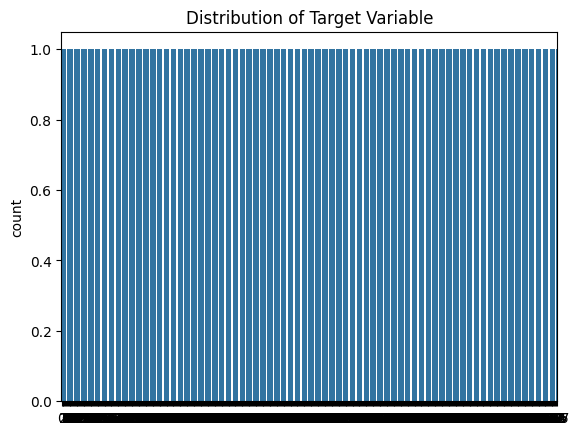

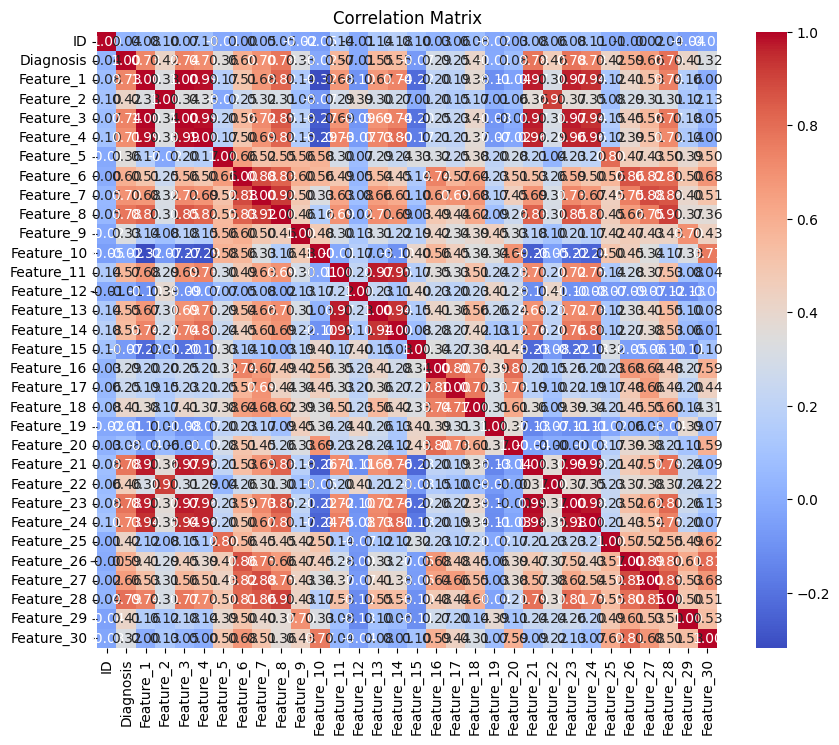

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv('/content/wdbc.data')
# converting feature 1 into ID and feature 2 into Diagnosis as target variable
data.columns = ['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, 31)]
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})  # Convert labels to binary

# Quick data overview
print(data.head())
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# EDA: Distribution of target variable
sns.countplot(data['Diagnosis'])
plt.title("Distribution of Target Variable")
plt.show()

# EDA: Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [12]:
from sklearn.preprocessing import StandardScaler

# Separating features and target
X = data.drop(['ID', 'Diagnosis'], axis=1)
y = data['Diagnosis']

# Scaling the features for SVM
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [13]:
# Define a function to train and evaluate an SVM with different kernels
def evaluate_svm(kernel):
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    return accuracy, report, conf_matrix

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

for kernel in kernels:
    accuracy, report, conf_matrix = evaluate_svm(kernel)
    results[kernel] = {
        "accuracy": accuracy,
        "classification_report": report,
        "confusion_matrix": conf_matrix
    }
    print(f"\nKernel: {kernel}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", conf_matrix)



Kernel: linear
Accuracy: 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        68
           1       0.98      0.93      0.96        46

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix:
 [[67  1]
 [ 3 43]]

Kernel: poly
Accuracy: 0.8947368421052632
Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92        68
           1       1.00      0.74      0.85        46

    accuracy                           0.89       114
   macro avg       0.93      0.87      0.88       114
weighted avg       0.91      0.89      0.89       114

Confusion Matrix:
 [[68  0]
 [12 34]]

Kernel: rbf
Accuracy: 0.956140350877193
Classification Report:
               precision    recall  f1-score   support

           0  

In [14]:
# Set up the parameter grid for C and gamma
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

# Grid Search with cross-validation
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)

# Results of the best model after tuning
print("Best Parameters:", grid.best_params_)
best_svm = grid.best_estimator_
y_pred_tuned = best_svm.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)

print("\nTuned Model Accuracy:", accuracy_tuned)
print("Tuned Model Classification Report:\n", classification_report(y_test, y_pred_tuned))
print("Tuned Model Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.0

In [15]:
# Display results
print("\nSummary of SVM Kernel Performance:")
for kernel in kernels:
    print(f"Kernel: {kernel}, Accuracy: {results[kernel]['accuracy']}")

print("\nAccuracy of Tuned RBF SVM:", accuracy_tuned)



Summary of SVM Kernel Performance:
Kernel: linear, Accuracy: 0.9649122807017544
Kernel: poly, Accuracy: 0.8947368421052632
Kernel: rbf, Accuracy: 0.956140350877193
Kernel: sigmoid, Accuracy: 0.9210526315789473

Accuracy of Tuned RBF SVM: 0.9736842105263158
